# CC1002 Sesion Activa: Programacion de un Agenda


 - Jérémy Barbay, jeremy@barbay.cl

## Temas abordados

1. [ ] Busqueda en lista enlazada
1. [ ] Busqueda en arbol binario de busqueda
1. [ ] Medicion de tiempo de ejecucion

## Objetivos de Aprendisaje





1. [ ] Entender que hay soluciones mejores que otras

## Instrucciones



Para realizar la actividad en clase, deben hacer una copia de este archivo y llenar los vacíos con sus explicaciones, sus implementaciones y sus pruebas mientras las sesiones de trabajo en "breakout group". El codigo siguiente puede ser util: 


## Estructura

En vez de importar `estructura.py`, pueden ejecutar esta cedula:

In [1]:
import sys
from collections import namedtuple
from keyword import iskeyword

def create_unmutable(name: str, fields: str) -> None:
    """Creates an unmutable C like structure given the name of the 
    structure and it's fields. The fields are a string separated by
    a blank space, one word is one field on the structure.

    Arguments:
        name {str} -- [The name of the structure]
        fields {str} -- [A string containing the fields of the structure]

    Returns:
        None -- [Adds the new structure to the global variables of the workspace]
    """
    frame = sys._getframe(1)
    frame.f_globals[name] = namedtuple(name, fields)

crear = create_unmutable

## Lista

En vez de importar `lista.py`, pueden ejecutar esta cedula:

In [3]:
# Diseno de la estructura
# lista : valor (any = cualquier tipo) siguiente (lista)
crear("lista", "valor siguiente")

# identificador para listas vacias
listaVacia = None

# crearLista: any lista -> lista
# devuelve una lista cuya cabeza es valor
# y la cola es resto
def crearLista(valor, resto):
        return lista(valor, resto)

# cabeza: lista -> any
# devuelve la cabeza de una lista (un valor)
def cabeza(lista): 
	return lista.valor

# cola: lista -> lista
# devuelve la cola de una lista (una lista)
def cola(lista):
	return lista.siguiente

# vacia: lista -> bool
# devuelve True si la lista esta vacia
def vacia(lista):
	return lista == listaVacia


# Tests

test_lista = lista(1, lista(2, lista(3, listaVacia)))

assert cabeza(test_lista) == 1
assert cabeza(cola(test_lista)) == 2
assert cabeza(cola(cola(test_lista))) == 3
assert cola(cola(test_lista)) == lista(3, listaVacia)

assert vacia(listaVacia)
assert not vacia(test_lista)
assert vacia(cola(cola(cola(test_lista))))



### Draw(x)

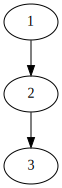

In [7]:
import graphviz
from IPython.display import display_svg, SVG, display
def draw(x):
  display = graphviz.Digraph()
  display.format = 'svg'
  def drawrecursive(x):
    if type(x) == int or type(x) == str: 
      display.node(repr(x),str(x))
    else:
      display.node(repr(x),str(x[0]))      
      for field in x[1:]:
       if field != None:
        drawrecursive(field)
        display.edge(repr(x),repr(field))
  drawrecursive(x)
  svg = display.pipe().decode('utf-8')
  return SVG(svg)

draw(test_lista)


---

# ACTIVIDADES

## Ejercicio: Agenda en  lista [5mns]

Completa el agenda de direcciones de correo electronicos en una lista **ordenada** para que el contiene al minimo 6 entradas distintas:

lista(valor=entrada(nombre='Alejandro', correo='ahevia@dcc.uchile.cl'), siguiente=lista(valor=entrada(nombre='Barbara', correo='barbara@poblete.cl'), siguiente=lista(valor=entrada(nombre='Jeremy', correo='jeremy@barbay.cl'), siguiente=None)))


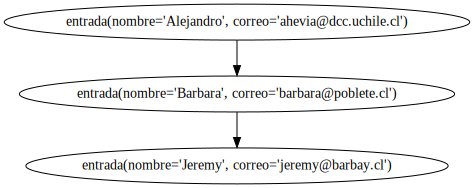

In [19]:
crear("entrada", "nombre correo")
agenda_en_lista = lista(entrada("Alejandro","ahevia@dcc.uchile.cl"),
               lista(entrada("Barbara","barbara@poblete.cl"), 
                     lista(entrada("Jeremy","jeremy@barbay.cl"), None))
)

print(agenda_en_lista)
draw(agenda_en_lista)

### EJEMPLO DE SOLUCION 

lista(valor=entrada(nombre='Alejandro', correo='ahevia@dcc.uchile.cl'), siguiente=lista(valor=entrada(nombre='Barbara', correo='barbara@poblete.cl'), siguiente=lista(valor=entrada(nombre='Jeremy', correo='jeremy@barbay.cl'), siguiente=lista(valor=entrada(nombre='Jeremy', correo='jeremy@dcc.uchile.cl'), siguiente=lista(valor=entrada(nombre='Jeremy', correo='jbarbay@dcc.uchile.cl'), siguiente=lista(valor=entrada(nombre='Jeremy', correo='jbarbay@uchile.cl'), siguiente=None))))))


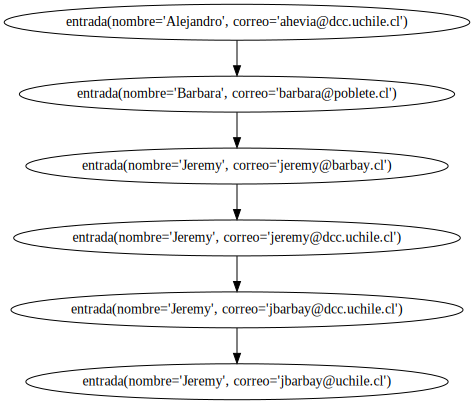

In [27]:
crear("entrada", "nombre correo")
agenda_en_lista = lista(entrada("Alejandro","ahevia@dcc.uchile.cl"),
               lista(entrada("Barbara","barbara@poblete.cl"), 
                     lista(entrada("Jeremy","jeremy@barbay.cl"), 
                           lista(entrada("Jeremy","jeremy@dcc.uchile.cl"),
                                         lista(entrada("Jeremy","jbarbay@dcc.uchile.cl"),
                                               lista(entrada("Jeremy","jbarbay@uchile.cl"),None))))))


print(agenda_en_lista)
draw(agenda_en_lista)

## Ejercicio: busca en lista [10 mns]

Nota que en Python, dos strings se pueden comparar muy facilamente:

In [37]:
"Alejandro" < "Jeremy"

True

In [38]:
"Barbara" < "Alejandro"

False

In [39]:
"Jeremy" <= "Jeremy"

True

Completa la funcion `busca_en_lista_ordenada(x,lista)` abajo para buscar para un nombre y imprimir (con `print()`) todas las direcciones de correo electronico associadas:

In [29]:
def busca_en_lista_ordenada(x,lista):
  if lista != listaVacia:
    if cabeza(lista).nombre == x:
      print(x.correo)
  # A completar...

busca_en_lista_ordenada("Jeremy",agenda_en_lista)

### EJEMPLO DE SOLUCION 

In [28]:
def busca_en_lista_ordenada(x,lista):
  if lista != listaVacia:
    if cabeza(lista).nombre == x:
      print(cabeza(lista).correo)
    if cabeza(lista).nombre <= x:
      busca_en_lista_ordenada(x,cola(lista))

busca_en_lista_ordenada("Jeremy",agenda_en_lista)

jeremy@barbay.cl
jeremy@dcc.uchile.cl
jbarbay@dcc.uchile.cl
jbarbay@uchile.cl


## Ejercicio: Agenda en ABB [5mns]

Completa el codigo abajo para construir un agenda en arbol de busqueda binario con al menos 6 entradas.

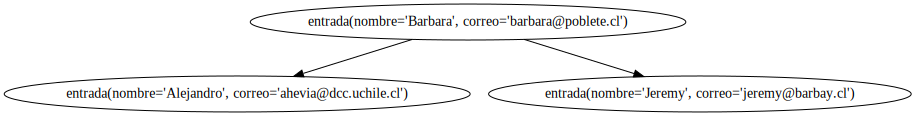

In [36]:
ale = entrada("Alejandro","ahevia@dcc.uchile.cl")
bar = entrada("Barbara","barbara@poblete.cl")
jer = entrada("Jeremy","jeremy@barbay.cl")


crear("abb", "info left right")
agenda_en_arbol = abb(bar,
                      abb(ale,None,None),
                      abb(jer,None,None))

draw(agenda_en_arbol)


### EJEMPLO DE SOLUCION 

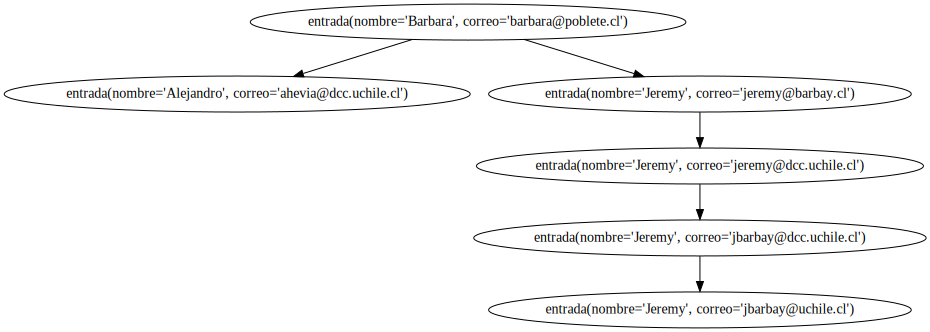

In [42]:
ale = entrada("Alejandro","ahevia@dcc.uchile.cl")
bar = entrada("Barbara","barbara@poblete.cl")
jer1 = entrada("Jeremy","jeremy@barbay.cl")
jer2 = entrada("Jeremy","jeremy@dcc.uchile.cl")
jer3 = entrada("Jeremy","jbarbay@dcc.uchile.cl")
jer4 = entrada("Jeremy","jbarbay@uchile.cl")

crear("abb", "info left right")
agenda_en_arbol = abb(bar,
                      abb(ale,None,None),
                      abb(jer1,
                          None,
                          abb(jer2,
                              None,
                              abb(jer3,
                                  None,
                                  abb(jer4,None,None)))))
draw(agenda_en_arbol)

## Ejercicio: Busca en arbol [10mns]

Completa el programa abajo para buscar en el arbol de busqueda arriba, y imprimir todos las direcciones de correo electronico associadas a un nombre `x`:

In [44]:
def busca_en_abb(x,abb):
  if abb!=None:
    if abb.info.nombre == x:
      print(abb.info.correo)
    ## Su codigo aqui

busca_en_abb("Jeremy",agenda_en_arbol)

### EJEMPLO DE SOLUCION 

In [43]:
def busca_en_abb(x,abb):
  if abb!=None:
    if abb.info.nombre == x:
      print(abb.info.correo)
    if x < abb.info.nombre:
      busca_en_abb(x,abb.left)
    else:
      busca_en_abb(x,abb.right)

busca_en_abb("Jeremy",agenda_en_arbol)

jeremy@barbay.cl
jeremy@dcc.uchile.cl
jbarbay@dcc.uchile.cl
jbarbay@uchile.cl


## Ejercicio: Comparacion [5mns]

Usando la cedula siguiente, compara el tiempo de las dos soluciones:

In [49]:
%timeit busca_en_lista_ordenada("Jeremy",agenda_en_lista)
%timeit busca_en_abb("Jeremy", agenda_en_arbol)

The slowest run took 30.73 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 255 ns per loop
The slowest run took 16.15 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 192 ns per loop


Reportan los tiempos promedios en el arreglo siguiente:

| Estructura | Tiempo |
|---|---|
| Lista |  | 
| ABB |  |


Pueden opinar algo sobre el tiempo de busqueda en general relativo, y sobre la razon por tal diferencia?

### EJEMPLO DE SOLUCION 

Reportan los tiempos promedios en el arreglo siguiente:

| Estructura | Tiempo (ns) |
|---|---|
| Lista | 255 | 
| ABB | 192 |


Buscar en un arbol binario de busqueda (si no demasiado desbalanceado) es mas rapido que buscar en una lista (aun que sea ordenada). 



---

# Anexo

## Ejercicio: [mns]

### EJEMPLO DE SOLUCION 

## Ejercicio: [mns]

### EJEMPLO DE SOLUCION 

## Ejercicio: [mns]

### EJEMPLO DE SOLUCION 